In [2]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis and Visualization/spotify-2023.csv", encoding='latin-1')


In [5]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [7]:
#Check for null values
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [8]:
#Fix null values
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [10]:
#Data Preparation
from sklearn.model_selection import train_test_split

#Target variable: streams
y = df['streams']

#Selecing our features (Independent variables)
X = df[['danceability_%', 'energy_%', 'key', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'valence_%']]
X['key'] = pd.factorize(X['key'])[0]

#Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-10-5b1c4e737c3f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['key'] = pd.factorize(X['key'])[0]


In [11]:
#Model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
#Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

#Target variable: streams
y = df['streams']

# Select your features (independent variables)
X = df[['danceability_%', 'energy_%', 'key', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'valence_%']]
X['key'] = pd.factorize(X['key'])[0]

#Handle NaN in X and y before splitting; Imputing missing values with the mean using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

#Checking if 'streams' column contains any non-numeric values:
non_numeric_streams = df['streams'][pd.to_numeric(df['streams'], errors='coerce').isnull()]
print(f"Non-numeric values in 'streams':\n{non_numeric_streams}")

#Removing rows with non-numeric 'streams':
df = df[pd.to_numeric(df['streams'], errors='coerce').notnull()]

#Updating y after removing rows:
y = df['streams']

#Convering 'streams' to numeric:
y = pd.to_numeric(y)

#If y contains NaNs, impute them with the mean or another suitable strategy
if y.isnull().any():
    y_imputer = SimpleImputer(strategy='mean')
    y = y_imputer.fit_transform(y.values.reshape(-1, 1))
    y = y.ravel()

#Aligning X and y after data cleaning
X = X[:len(y)]  #Ensuring X has the same number of rows as y

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Non-numeric values in 'streams':
574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


<ipython-input-12-e7e28a97ba38>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['key'] = pd.factorize(X['key'])[0]


In [13]:
#Model training
model = LinearRegression()
model.fit(X_train, y_train)

#Prediction and Evaluation
y_pred = model.predict(X_test)

#Checking for NaNs in y_test and y_pred
print("NaNs in y_test:", pd.isnull(y_test).sum())
print("NaNs in y_pred:", pd.isnull(y_pred).sum())

#Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

NaNs in y_test: 0
NaNs in y_pred: 0
Mean Squared Error: 3.108785913937911e+17
R-squared: -0.013882757589883665


In [14]:
#Identifying top songs
df['predicted_popularity'] = model.predict(X)
top_songs = df.sort_values(by=['predicted_popularity'], ascending=False).head(10)  #To Getting top 10 songs
print(top_songs[['track_name', 'artist(s)_name', 'predicted_popularity']])

                                            track_name  \
580                                           Acapulco   
685                                  Thinking Out Loud   
910                                      The Scientist   
184                                         Apocalypse   
692                               Gospel (with Eminem)   
698                                       Sweetest Pie   
284                                      METAMORPHOSIS   
387  Lift Me Up - From Black Panther: Wakanda Forev...   
821                                   The Heart Part 5   
183                                      Car's Outside   

                    artist(s)_name  predicted_popularity  
580                   Jason Derulo          6.114701e+08  
685                     Ed Sheeran          6.063397e+08  
910                       Coldplay          5.984081e+08  
184           Cigarettes After Sex          5.915286e+08  
692                Eminem, Dr. Dre          5.716548e+08  
698  Du

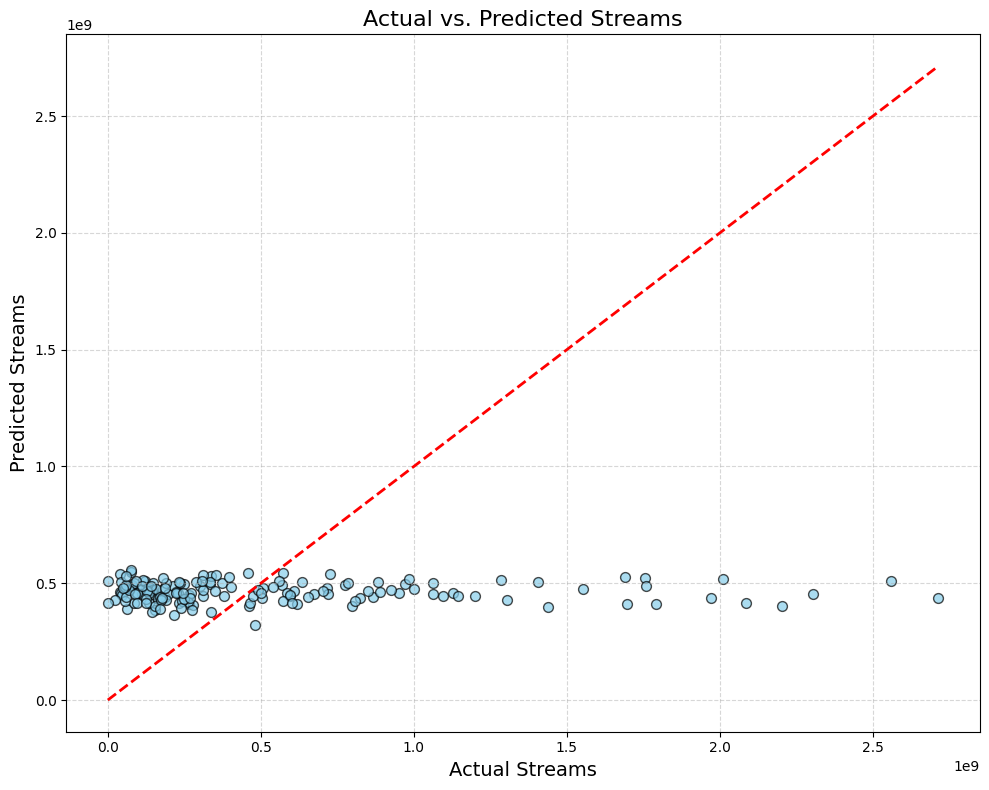

In [19]:
#Visualize the relationship between predicted and actual popularity
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue', edgecolors='black', s=50)
plt.xlabel("Actual Streams", fontsize=14)
plt.ylabel("Predicted Streams", fontsize=14)
plt.title("Actual vs. Predicted Streams", fontsize=16)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

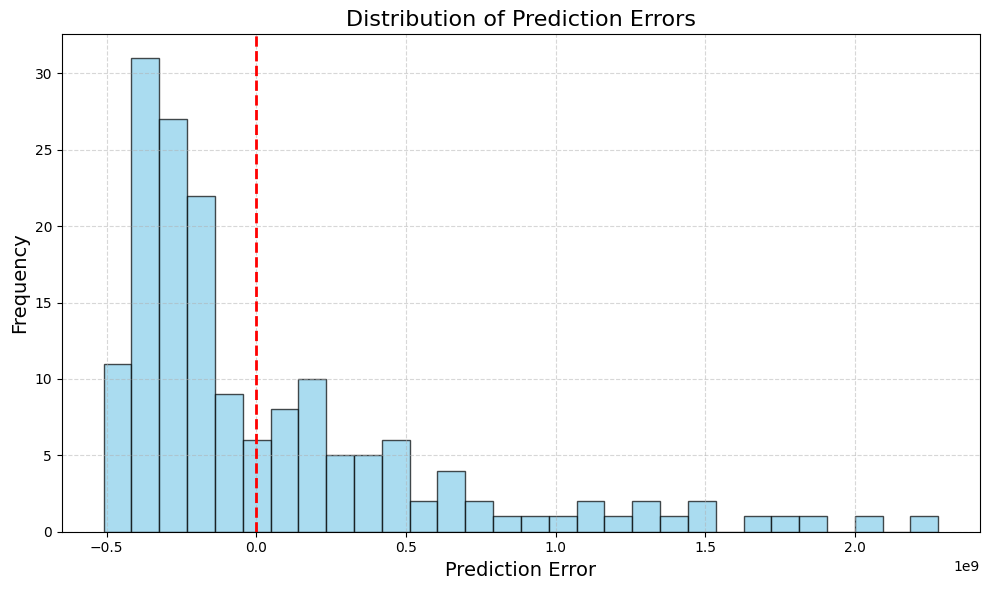

In [20]:
#Visualize the distribution of prediction errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Prediction Error", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Prediction Errors", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.tight_layout()
plt.show()

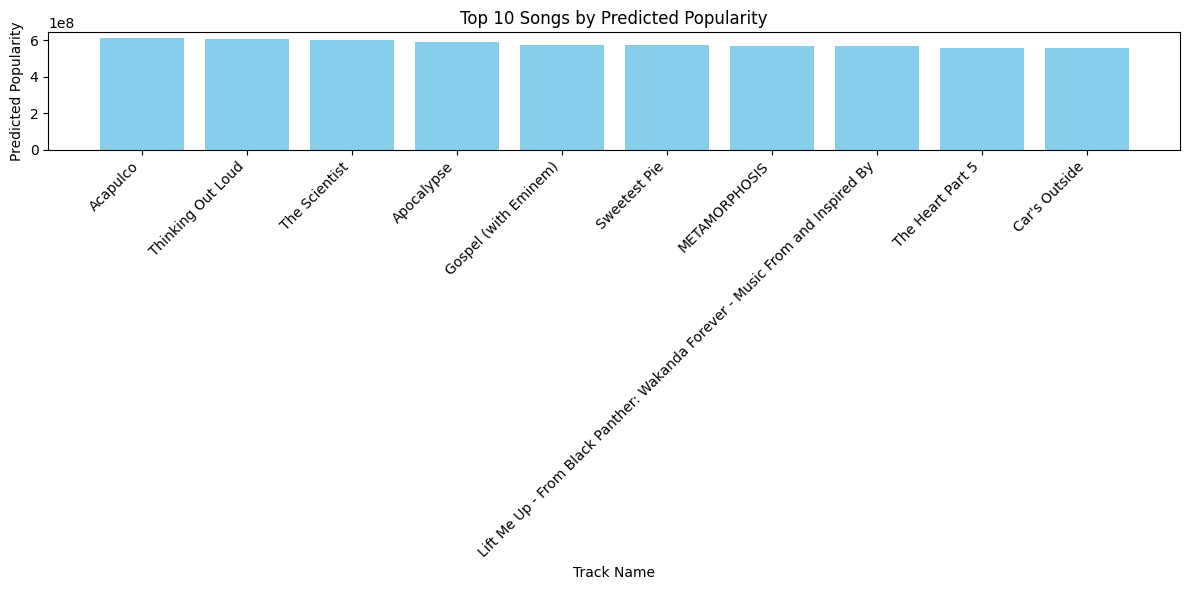

In [17]:
#Bar chart of top songs
plt.figure(figsize=(12, 6))
plt.bar(top_songs['track_name'], top_songs['predicted_popularity'], color='skyblue')
plt.xlabel("Track Name")
plt.ylabel("Predicted Popularity")
plt.title("Top 10 Songs by Predicted Popularity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

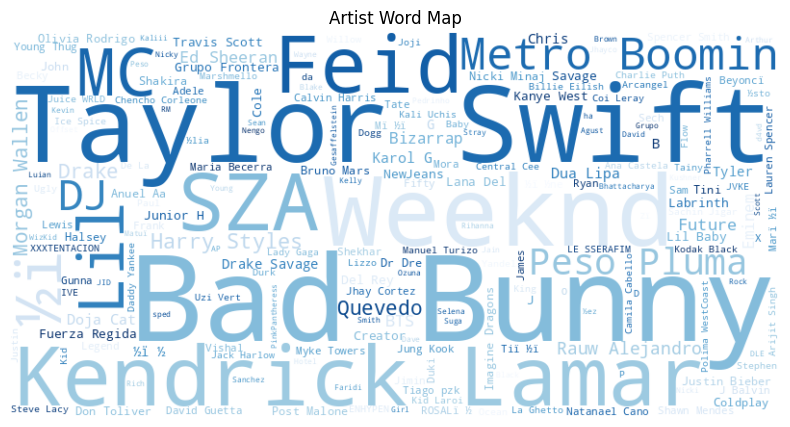

In [22]:
from wordcloud import WordCloud
text = ' '.join(df['artist(s)_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Artist Word Map')
plt.show()